# Lecture 10 - Transformers and Pretraining

provided by [Stanford CS224N](https://www.youtube.com/watch?v=rmVRLeJRkl4)

---

<div class="alert alert-block alert-info">
Table of Contents: <br>
    
<ul>
    <li>1. <a href="#1.-Introduction">Introduction</a></li>
    <li>2. <a href="#2.-Subword-Models">Subword Models</a></li>
    <li>3. <a href="#3.-Pretraining-for-Decoders">Pretraining for Decoders</a></li>
    <li>4. <a href="#4.-Pretraining-for-Encoders">Pretraining for Encoders</a></li>
    <li>5. <a href="#5.-Pretraining-for-Encoder-Decoders">Pretraining for Encoder-Decoders</a></li>
    <li>6. <a href="#6.-Resource">Resource</a></li>
</ul>
</div>

# 1. Introduction

Today we focus heavily on pretraining Transformers and talk about popular methods like BERT and GPT.

# 2. Subword Models

Usually we use a finite vocabulary set, but in many languages with complex _morphologies_ or word structures, this doesn't make much sense. So mapping a single word to an embedding vector may just be something specific to English. 

The __byte-pair encoding__ algorithm is a go-between between the 2 options: looking at language at the character-level and looking at language at the word-level. This algorithm learns a vocabulary from subword tokens or tokens that represent parts of words. 

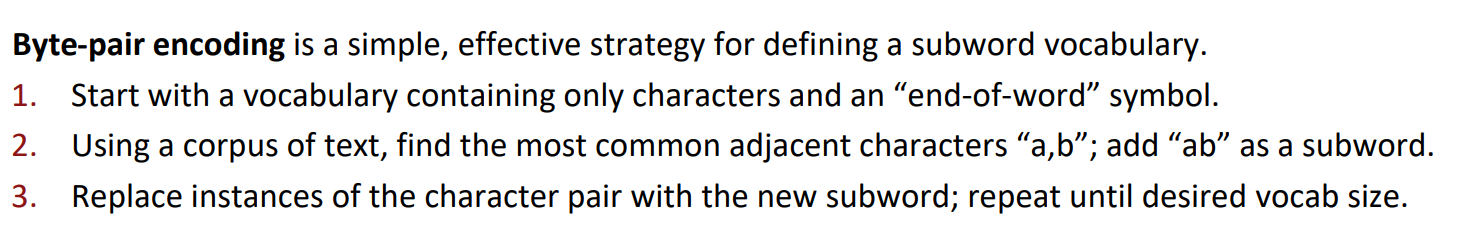 <br>
_Figure 1. Byte-pair encoding algorithm._

Before, in word2vec, we focused on pretrained word embeddings. This draws on the assumption that the downstream NLP task will have enough data to provide sufficient context for the word embeddings to be contextualized in your task. The model would not be pretrained.

However, in modern deep learning and NLP, we pretrain both the word embeddings and the model. 

The __pretraining/finetuning__ paradigm is immensely successful in NLP (and also other fields of AI).

# 3. Pretraining for Decoders

Pretraining transformers, or more generally encoder-decoder seq2seq models, can be divided into 3 categories: pretraining decoder only, encoder only, and both. First we take a look at pretraining only a decoder.

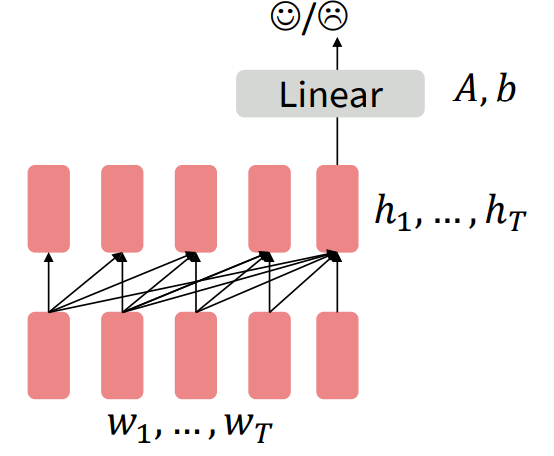 <br>
_Figure 2. Pretraining decoder on auxiliary task._

Notice in Figure 2, we pretrain the word embeddings (the bottom most row of blocks) and also the network itself. The Linear layer is throwaway and used for the specific auxiliary task.

__Generative Pretrained Transformer (GPT)__ was a Transformer decoder (no encoder!) with 12 layers, 768-dimensional hidden states, and 3072-dimensional FFN hidden layers. They used byte-pair encoding with 40,000 merges. I think what they mean by this is they were able to construct 40,000 matches of subword tokens. The model they trained (GPT1) was trained on BooksCorpus (over 7000 books).

They formatted the inputs to the decoder in a __natural language inference__ format. This is where the model is fed 2 sentences: a _premise_ and a _hypothesis_. The model is then trained to predict whether the hypothesis is entailing, contradictory, or neutral to the premise sentence. 

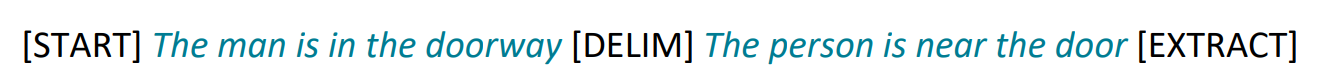 <br>
_Figure 3. GPT input format._

In Figure 3, they roughly formatted this task in a series of tokens. 

__GPT-2__ and __GPT-3__ are larger newer versions of the original GPT trained on even larger amounts of data.

# 4. Pretraining for Encoders

For encoders, we can't pretrain it like a normal language model (because encoders, in the Transformer, have bidirectional context). 

The way we pretrain an encoder is feed in a sentence but with randomly words masked. The encoder is then tasked to predict the masked words. This is called __masked language modeling__.

__Bidrectional Encoder Representations from Transformers (BERT)__ employs this paradigm. Instead, they replace an input word with `[MASK]` 80% of the time. 10% of the time it will replace the input word with a random token and 10% of the time it will leave the input word unchanged. The reasoning for the last 2 options (as opposed to just simply randomly masking words) is to force the model to learn meaningful representations instead of just focusing on finding the right word for the masked token. 

Another way of pretraining, introduced in BERT, was passing in 2 pieces of contiguous text. And the model is tasked with classifying whether or not the 2nd piece of text directly follows the 1st piece of text.

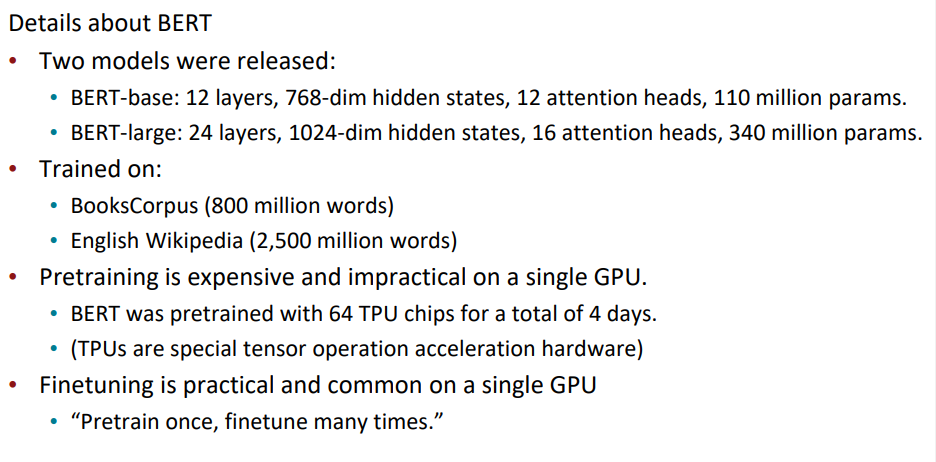 <br>
_Figure 4. Details about BERT._

Evaluating in NLP is difficult. Many NLP experts have built datasets that are particularly hard because of certain themes and understandings that must be understood to perform well on those datasets. 

Here are a few:
* QQP (Quora Question Pairs)
    * detect paraphrase questions
* QNLI
    * natural language inference
* SST-2 
    * sentiment analysis
* CoLA
    * corpus of linguistic acceptability; detect whether sentences are grammatically correct
* STS-B
    * semantic textual similarity
* MRPC
    * microsoft paraphrase corpus
* RTE
    * small natural language inference corpus

There are many BERT variants like RoBERTa, SpanBERT, DistilBERT, etc. __RoBERTa__ trains BERT for a longer period of time because they claim BERT was underfit and they also remove the next-sentence prediction task. __SpanBERT__ masks a contiguous span of words. 

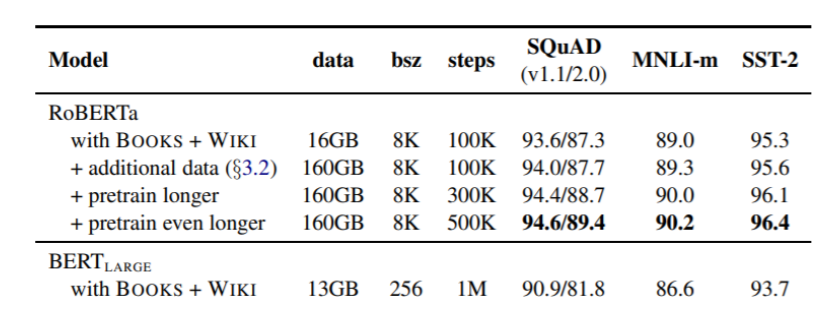 <br>
_Figure 5. RoBERTa compared to BERT._

The general trend is just longer training on larger datasets with larger models. 

# 5. Pretraining for Encoder-Decoders

A model called __T5__ is trained with __span corruption__. Instead of masking a single word, we mask a span of words and replace it with a single token. So the model not only has to predict what's missing, but it also doesn't know how many subwords are missing (so it must learn this too!).

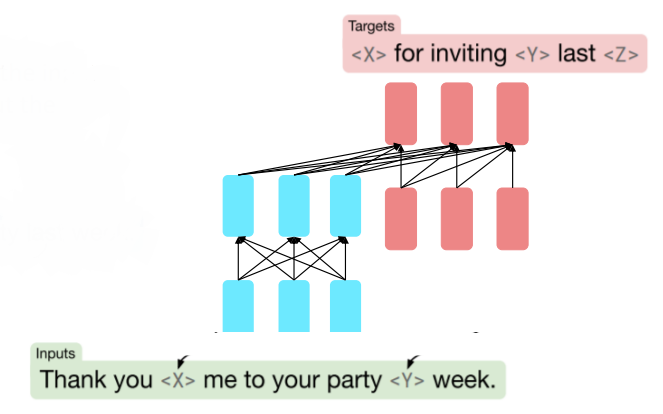 <br>
_Figure 6. Span Corruption._

One interesting property of T5 was that it could be finetuned to answer general questions by retrieving knowledge from its parameters.

By pretraining, the model can learn trivia knowledge, syntax, coreference, lexical semantics/topics, sentiment, simple arithmetic, and also cultural aspects of society.

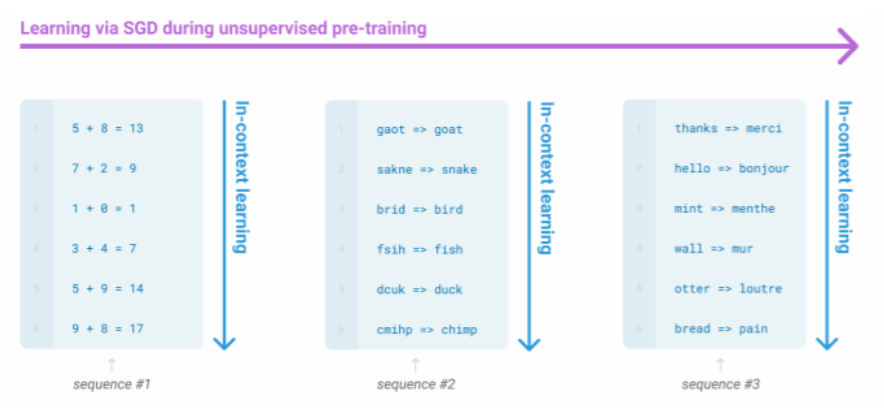 <br>
_Figure 7. Learning without gradient steps._

Large language models seem to be able to pick up patterns in the text from what I'm understanding.

# 6. Resource

If you missed the link right below the title, I'm providing the resource here again along with the course website.

- [Stanford CS224N](https://www.youtube.com/watch?v=rmVRLeJRkl4)
- [Course Website](http://web.stanford.edu/class/cs224n/)

This is a series of 23 lectures provided by Stanford.
